## Import Library

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data, terutama data tabular (DataFrame)
import numpy as np  # Numpy untuk komputasi numerik dan operasi array/matriks
import matplotlib.pyplot as plt  # Matplotlib untuk membuat visualisasi seperti grafik dan plot
import seaborn as sns  # Seaborn untuk visualisasi data statistik dengan tampilan yang lebih estetik
import re  # Modul regex untuk pencarian dan manipulasi teks berbasis pola
import string  # Modul yang berisi konstanta string seperti huruf dan tanda baca
import requests  # Untuk melakukan HTTP request (misal: mengambil data dari API atau web)
import nltk  # Natural Language Toolkit, pustaka NLP untuk bahasa Inggris dan multibahasa
from nltk.tokenize import word_tokenize  # Untuk memecah kalimat menjadi kata-kata (tokenisasi)
from nltk.corpus import stopwords  # Menyediakan kumpulan kata-kata umum yang bisa dihapus (stopwords)
nltk.download('punkt_tab')  # Mengunduh tokenizer berbasis tanda baca
nltk.download('stopwords')  # Mengunduh daftar stopwords untuk berbagai bahasa

# Install library Sastrawi (khusus Bahasa Indonesia)
!pip install sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Untuk stemming: mengubah kata ke bentuk dasar (akar kata)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Untuk menghapus kata-kata umum (stopwords) dalam Bahasa Indonesia
from wordcloud import WordCloud  # Untuk membuat visualisasi word cloud dari teks
import random  # Untuk operasi randomisasi seperti sampling, shuffle, dll.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


## Loading Dataset

In [ ]:
# Load dataset
df_loaded = pd.read_excel('/content/Fact News.xlsx')
print('Dimensi data:', df_loaded.shape)
df_loaded.head()

Dimensi data: (15936, 6)


,date,status,title,description,link,imageurl
0,2025-05-29,FAKTA,Reksa dana Henan Asset raih penghargaan dari G...,Jakarta (ANTARA) - Perusahaan manajer investas...,https://www.antaranews.com/berita/4867093/reks...,NaN
1,2025-05-29,FAKTA,Mary Kay Inc. Berikan 10 Dana Hibah Kepada Ino...,Dallas--(ANTARA/Business Wire)-- Mary Kay Inc....,https://www.antaranews.com/berita/4866697/mary...,NaN
2,2025-05-29,FAKTA,KPK masih mendalami hasil pemeriksaan soal pan...,Jakarta (ANTARA) - Komisi Pemberantasan Korups...,https://www.antaranews.com/berita/4866609/kpk-...,NaN
3,2025-05-29,FAKTA,Kemkomdigi blokir archive.org karena konten ju...,Jakarta (ANTARA) - Kementerian Komunikasi dan ...,https://www.antaranews.com/berita/4866597/kemk...,NaN
4,2025-05-29,FAKTA,"DoveRunner Perluas Penawaran Di Wilayah Baru, ...",Pilihan baru untuk pemrosesan dan penyimpanan ...,https://www.antaranews.com/berita/4865893/dove...,NaN


In [ ]:
# Load dataset
df_loaded_2 = pd.read_excel('/content/[UPDATE] News Dataset.xlsx')
print('Dimensi data:', df_loaded_2.shape)
df_loaded_2.head()

Dimensi data: (16395, 6)


,Date,Status,Title,Description,Link,ImageURL
0,"April 25, 2025",BELUM TERBUKTI,Penemuan Makam Nabi di Tembok Besar China,Tidak ditemukan informasi atau pemberitaan kre...,https://turnbackhoax.id/2025/04/25/belum-terbu...,https://storage.googleapis.com/image_from_scra...
1,"April 29, 2024",BELUM TERBUKTI,WhatsApp Bocorkan Informasi Warga Palestina ke...,Hasil periksa fakta Arief Putra Ramadhan. Juru...,https://turnbackhoax.id/2024/04/29/belum-terbu...,https://storage.googleapis.com/image_from_scra...
2,"August 16, 2024",BELUM TERBUKTI,Air Rebusan Daun Sirih Dapat Mengobati Iritasi...,Hasil periksa fakta Evarizma Zahra. Konten yan...,https://turnbackhoax.id/2024/08/16/belum-terbu...,https://storage.googleapis.com/image_from_scra...
3,"August 16, 2024",BELUM TERBUKTI,Getah Mahkota Duri Bisa Obati Gigi Berlubang,Hasil periksa fakta Evarizma Zahra. Konten yan...,https://turnbackhoax.id/2024/08/16/belum-terbu...,https://storage.googleapis.com/image_from_scra...
4,"August 19, 2024",BELUM TERBUKTI,Bunga Telang Solusi Atasi Mata Buram dalam Hit...,Hasil periksa fakta Raymondha Klaim mengenai b...,https://turnbackhoax.id/2024/08/19/belum-terbu...,https://storage.googleapis.com/image_from_scra...


In [ ]:
# Memilih hanya kolom 'status' dan 'description'
data = df_loaded[['status', 'description']]

# Melihat beberapa baris data
print('Dimensi data:', data.shape)
data.head()

Dimensi data: (15936, 2)


,status,description
0,FAKTA,Jakarta (ANTARA) - Perusahaan manajer investas...
1,FAKTA,Dallas--(ANTARA/Business Wire)-- Mary Kay Inc....
2,FAKTA,Jakarta (ANTARA) - Komisi Pemberantasan Korups...
3,FAKTA,Jakarta (ANTARA) - Kementerian Komunikasi dan ...
4,FAKTA,Pilihan baru untuk pemrosesan dan penyimpanan ...


In [ ]:
# Memilih hanya kolom 'Status' dan 'Description'
data_2 = df_loaded_2[['Status', 'Description']]

# Melihat beberapa baris data
print('Dimensi data:', data_2.shape)
data_2.head()

Dimensi data: (16395, 2)


,Status,Description
0,BELUM TERBUKTI,Tidak ditemukan informasi atau pemberitaan kre...
1,BELUM TERBUKTI,Hasil periksa fakta Arief Putra Ramadhan. Juru...
2,BELUM TERBUKTI,Hasil periksa fakta Evarizma Zahra. Konten yan...
3,BELUM TERBUKTI,Hasil periksa fakta Evarizma Zahra. Konten yan...
4,BELUM TERBUKTI,Hasil periksa fakta Raymondha Klaim mengenai b...


In [ ]:
# Menyatukan kedua DataFrame berdasarkan baris
# Mengubah nama kolom di data_2 agar sesuai dengan data
data_2 = data_2.rename(columns={'Status': 'status', 'Description': 'description'})
data_combined = pd.concat([data, data_2], ignore_index=True)

# Melihat beberapa baris data gabungan
print('Dimensi data gabungan:', data_combined.shape)
data_combined.head()

Dimensi data gabungan: (32331, 2)


,status,description
0,FAKTA,Jakarta (ANTARA) - Perusahaan manajer investas...
1,FAKTA,Dallas--(ANTARA/Business Wire)-- Mary Kay Inc....
2,FAKTA,Jakarta (ANTARA) - Komisi Pemberantasan Korups...
3,FAKTA,Jakarta (ANTARA) - Kementerian Komunikasi dan ...
4,FAKTA,Pilihan baru untuk pemrosesan dan penyimpanan ...


## Preprocessing

In [ ]:
# Menampilkan informasi data
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32331 entries, 0 to 32330
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       32331 non-null  object
 1   description  32330 non-null  object
dtypes: object(2)
memory usage: 505.3+ KB


In [ ]:
# Memeriksa duplikasi data
if data_combined.duplicated().sum() == 0:
  print('Tidak ada duplikasi data')
else:
  print('Duplikasi data ditemukan sebanyak', data_combined.duplicated().sum(), 'baris')

Duplikasi data ditemukan sebanyak 52 baris


In [ ]:
# Menghapus baris duplikat pada dataset
data_combined = data_combined.drop_duplicates()
print('Dimensi data:', data_combined.shape)

Dimensi data: (32279, 2)


In [ ]:
# Memeriksa missing values
print(data_combined.isnull().sum())

status         0
description    1
dtype: int64


In [ ]:
# Handle missing values by dropping rows with any missing value
data_combined.dropna(inplace=True)
print("Missing values after dropping:")
print(data_combined.isnull().sum())
print('Dimensi data setelah menghapus missing values:', data_combined.shape)

Missing values after dropping:
status         0
description    0
dtype: int64
Dimensi data setelah menghapus missing values: (32278, 2)


In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.replace('\n', ' ')  # Ganti newline dengan spasi
    text = re.sub(r'([,.!?()"])', r' \1 ', text) # Pisahkan tanda baca sebelum dihapus agar kata tidak menyatu
    text = re.sub(r'([a-zA-Z]+)[\"()_-]([a-zA-Z]+)', r'\1 \2', text) # Pisahkan kata yang menyatu akibat tanda baca seperti kutip, kurung, atau koma
    text = text.translate(str.maketrans('', '', string.punctuation)) # Hapus tanda baca setelah pemisahan dilakukan
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Hapus emoji dan karakter non-ASCII
    text = re.sub(r'\b(\w*[^aeiou\s])(nya|nua|neo)\b', r'\1 \2', text)  # Pisahkan imbuhan "-nya" dan typo seperti "nua" sebelum tokenisasi
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berulang
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "yg"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama cama": "sama sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "ga": "tidak", "gak": "tidak", "nggak": "tidak", "bagu": "bagus", "pleasereturn": "please return", "udh": "sudah", "kren": "keren", "habi": "habis", "gamenya": "game nya", "ok": "oke", "gems": "gem", "gme": "game", "anj": "anjing", "bestgw": "best gw", "ngak": "tidak", "gk": "tidak", "cet": "chat", "krna": "karena", "karna": "karena", "krna": "karena", "lma": "lima", "kasi": "kasih", "terimakasih": "terima kasih", "nunggu": "tunggu", "ngk": "tidak", "uda": "sudah", "super cell": "supercell", "sya": "saya", "klan": "clans", "dikit": "sedikit", "bosen": "bosan", "g": "tidak", "hapu": "hapus", "apk": "aplikasi", "lvl": "level", "tropy": "trophy", "trofi": "trophy", "tropi": "trophy", "trofy": "trophy", "th": "town hall", "bh": "builder hall", "sdh": "sudah", "skrng": "sekarang", "asik": "asyik", "tetep": "tetap", "pleton": "peleton", "hilan": "hilang", "ilang": "hilang", "kluar": "keluar", "nyuri": "curi", "kgk": "tidak", "taii": "tahi", "mmg": "memang", "terllebih": "terlebih", "klow": "kalau", "smkn": "semakin", "yutub": "youtube", "nyaa": "nya", "knapa": "kenapa", "doank": "doang", "sampek": "sampai", "ksel": "kesal", "un install": "uninstall", "nggk": "tidak", "lv": "level", "trss": "terus", "smoga": "semoga", "hedehh": "aduh", "kalok": "kalau", "supersel": "supercell", "ajir": "anjing", "stressss": "stres", "gx": "tidak", "berjln": "berjalan", "apdet": "update", "naikk": "naik", "gmku": "game ku", "gmn": "bagaimana", "gimana": "bagaimana", "gimna": "bagaimana", "bugg": "bug", "pliss": "please", "dwonload": "download", "ferfek": "perfect", "swbaik": "sebaik", "boong": "bohong", "geme": "game", "ngelek": "lag", "ngelag": "lag", "msuk": "masuk", "jrgn": "jaringan", "pleace": "please", "sukai": "suka", "menyukai": "suka", "asyiiik": "asyik", "buanget": "banget", "bgt": "banget", "nunggu": "tunggu", "nunggunya": "tunggu", "menunggu": "tunggu", "klen": "clan", "clos": "close", "vrifikasi": "verifikasi", "thun": "tahun", "okelah": "oke", "baguslah": "bagus", "ngurangnya": "kurang", "berkurang": "kurang", "ancuran": "hancur", "bngunan": "bangunan", "maenin": "main", "mainin": "main", "maen": "main", "bermain": "main", "jaman": "zaman", "pleyer": "player", "ngebug": "bug", "plenton": "peleton", "skli": "sekali", "mngunduh": "unduh", "mengunduh": "unduh", "yt": "youtube", "heker": "hacker", "hek": "hack", "hengker": "hacker", "bantuwan": "bantuan", "mencapay": "capai", "mencapai": "capai", "gampang": "mudah", "gmpng": "mudah", "ez": "mudah", "jls": "jelas", "gjls": "ga jelas", "sdah": "sudah", "updete": "update", "separingan": "sparing", "ajg": "anjing", "tidack": "tidak", "santuy": "santai", "sans": "santai", "sanss": "santai", "ajing": "anjing", "smpe": "sampai", "wktu": "waktu", "jangn": "jangan", "kelar": "selesai", "gilaa": "gila", "ngejar": "kejar", "loggin": "login", "ngeselin": "kesel", "lwan": "lawan", "lbih": "lebih", "lbuh": "lebih", "ndk": "tidak", "imbng": "imbang", "trofinya": "trophy", "ngehilangin": "hilang", "ilangin": "hilang", "ngilang": "hilang", "ganguan": "gangguan", "berfikir": "pikir", "fikir": "pikir", "bgus": "bagus", "pletton": "peleton", "aaplikasi": "aplikasi", "uninstal": "uninstall", "puasssss": "puas", "kesel": "kesal", "gblk": "bodoh", "goblok": "bodoh", "nambah": "tambah", "ngeleg": "lag", "benerin": "perbaiki", "enakk": "enak", "skrg": "sekarang", "pensi": "pensiun", "cic": "coc", "abdetnya": "update", "krang": "kurang", "plsss": "please", "donglot": "download", "pingin": "ingin", "pengen": "ingin", "nua": "nya", "nyaaa": "nya", "nyaa": "nya", "kasihh": "kasih", "pdhl": "padahal", "sblm": "sebelum", "yng": "yang", "dng": "dengan", "dgn": "dengan", "levl": "level", "santay": "santai", "ajh": "saja", "att": "attack", "atk": "attack", "atck": "attack", "atack": "attack", "cma": "cuma", "super sel": "supercell", "blom": "belum", "perbaikin": "perbaiki", "dtk": "detik", "jm": "jam", "mnt": "menit", "hadehh": "aduh", "hadehhh": "aduh", "hadehhhh": "aduh", "hadehhhhh": "aduh", "trop": "troop", "banyakin": "banyak", "mengambil": "ambil", "diambil": "ambil", "mngmbil": "ambil", "jt": "juta", "rb": "ribu", "diapdet": "update", "reting": "rating", "dahh": "sudah", "udahh": "sudah", "rusakkkkkk": "rusak", "kam": "kan", "disain": "desain", "design": "desain", "desgn": "desain", "overal": "overall", "gemz": "gem", "selanjutnya": "lanjut", "selanjut": "lanjut", "slnjtnya": "lanjut", "upgred": "upgrade", "membosankan": "bosan", "ngebosenin": "bosan", "bosenin": "bosan", "bangetttt": "banget", "buanget": "banget", "bet": "banget", "bat": "banget", "pakah": "apakah", "akalll": "akal", "loding": "loading", "prisai": "perisai", "gam": "game", "dimna": "dimana", "pletonya": "peleton", "infonya": "info", "namanya": "nama", "ntah": "entah", "enaknya": "enak", "orangnya": "orang", "sebaiknya": "baik", "baiknya": "baik", "bagusnya": "bagus", "mantapp": "mantap", "mantpppnya": "mantap", "mantapnya": "mantap", "kurangnya": "kurang", "adanya": "ada", "ngerugiiin": "rugi", "ngerugiin": "rugi", "super sell": "supercell", "aplgi": "apalagi", "hadeh": "aduh", "haduh": "aduh", "banyank": "banyak", "karenakan": "karena", "dikarenakan": "karena", "gerakin": "gerak", "bergerak": "gerak", "turunin": "turun", "nurunin": "turun", "menekan": "tekan", "ditekan": "tekan", "pencet": "tekan", "kepencet": "tekan", "dipencet": "tekan", "keteken": "tekan", "ketekan": "tekan", "nyinpen": "simpan", "menyimpan": "simpan", "menyimpannya": "simpan", "simpenan": "simpan", "simpanan": "simpan", "baseku": "base", "punyaku": "punya", "lomot": "lama", "lemot": "lama", "lemooot": "lama", "lamaa": "lama", "lamaaa": "lama", "ramadan": "ramadhan", "ramadn": "ramadhan", "ramdhan": "ramadhan", "romadon": "ramadhan", "ngilang": "hilang", "ngilangin": "hilang", "diupadate": "update", "dirubah": "ubah", "bacaan": "baca", "bhkan": "bahkan", "ngebangun": "bangun", "upgradenya": "upgrade", "mulu": "melulu", "tuk": "untuk", "ss": "screenshot", "lowww": "rendah", "ksih": "kasih", "dimainin": "main", "smua": "semua", "lasung": "langsung", "thankss": "terima kasih", "thanks": "terima kasih", "thank you": "terima kasih", "thankyou": "terima kasih", "hidupkan": "hidup", "mengirimkan": "kirim", "sring": "sering", "gede": "besar", "kesalah": "salah", "kesalahan": "salah", "dibikin": "bikin", "try": "coba", "trobel": "masalah", "trouble": "masalah", "problem": "masalah", "haddeeeehhh": "aduh", "kesusahan": "sulit", "susah": "sulit", "kesulitan": "sulit", "nyerang": "serang", "disarankan": "saran", "orng": "orang", "sebetul": "sebenarnya", "sebenernya": "sebenarnya", "yerang": "serang", "dapt": "dapat", "mainkan": "main", "dibuka": "buka", "mantab": "mantap", "merubah": "ubah", "berubah": "ubah", "mengubah": "ubah", "sarankan": "saran", "menjadikan": "jadi", "moga": "semoga", "ampe": "sampai", "cadangin": "cadangan", "bukak": "buka", "diperbaiki": "perbaiki", "baiki": "perbaiki", "ngelegpatah": "lag patah", "truss": "terus", "kmbali": "kembali", "elix": "elixir", "memakai": "pakai", "memasak": "masak", "ngirim": "kirim", "ngurang": "kurang", "bhg": "bohong", "tiggl": "tinggal", "baget": "banget", "rubah": "ubah", "pdahal": "padahal", "sebel": "kesal", "nyelesain": "selesai", "dibanyakin": "banyak", "tingkatin": "tingkatkan", "dibutuhkan": "butuh", "kebanyakan": "banyak", "kurangin": "kurang", "updatenya": "update", "eror": "error", "agame": "game", "fisual": "visual", "kebuka": "buka", "dapatkan": "dapat", "dikasih": "kasih", "forclose": "force close", "dirugikan": "rugi", "cach": "cache", "nerusin": "terus", "downloadupdate": "download update", "kondisikan": "kondisi", "desanya": "desa", "dianggap": "anggap", "itemgoldpass": "item gold pass", "msih": "masih", "sekokoh": "kokoh", "setebel": "tebal", "setebal": "tebal", "ditembus": "tembus", "harapaku": "harapan", "ngeluarin": "keluar", "bnyak": "banyak", "skali": "sekali", "sekreatif": "kreatif", "kreativ": "kreatif", "aplikasinya": "aplikasi", "lbh": "lebih", "leval": "level", "sampae": "sampai", "tlg": "tolong", "clan": "clans", "diilangin": "hilang", "gada": "tidak ada", "gabisa": "tidak bisa", "kembangin": "kembangkan", "sbar": "sabar", "temanteman": "teman teman", "trimakasi": "terima kasih", "make": "pakai", "spel": "spell", "supersell": "supercell", "yaaaa": "iya", "ajah": "saja", "setujuh": "setuju", "towenhal": "town hall", "tolonglah": "tolong", "blankscreen": "blank screen", "dripada": "daripada", "trimakasih": "terima kasih", "ninggalin": "tinggal", "super sel": "supercell", "totong": "tolong", "ngebantu": "bantu", "darimu": "dari kamu", "laglogo": "lag logo", "enakan": "enak", "mikirlaah": "mikir", "kasian": "kasihan", "banguna": "bangunan", "dibenerin": "perbaiki", "gemenya": "game", "olih": "oleh", "coleb": "kolaborasi", "nyediain": "sedia", "conten": "konten", "content": "konten", "emaseleksireleksir": "emas elixir elixir", "eleksir": "elixir", "coc": "clash of clans", "buruklah": "buruk", "evnt": "event", "jad": "jadi", "peletonarmy": "peleton", "koinya": "koin", "nglooting": "loot", "looting": "loot", "ngeloot": "loot", "mutar": "putar", "puter": "putar", "muter": "putar", "uprgrde": "upgrade", "jaringankoneksi": "koneksi", "menyebalkan": "kesal", "balaikota": "town hall", "ngapa": "kenapa", "ngedit": "edit", "jrang": "jarang", "capek": "lelah", "aje": "saja", "susahnyah": "sulit", "supercelll": "supercell", "eliksir": "elixir", "sinyaljaringan": "sinyal", "signal": "sinyal", "trsbt": "tersebut", "jelass": "jelas", "padahl": "padahal", "memain": "main", "skarang": "sekarang", "daei": "dari", "semnarik": "menarik", "mrngira": "kira", "unistall": "uninstall", "mengecewakan": "kecewa", "pncarian": "pencarian", "setalah": "setelah", "gimanaa": "bagaimana", "system": "sistem", "alasanya": "alasan", "notif": "notifikasi", "super cell": "supercell", "pager": "pagar", "dapetin": "dapat", "dis connect": "disconnect", "sehinga": "sehingga", "supercel": "supercell", "emaselilsireliksir": "emas elixir elixir", "yak": "iya", "ga": "tidak", "updatean": "update", "kembaliin": "kembalikan", "gituh": "begitu", "dmna": "dimana", "sala": "salah", "memory": "memori", "sekedar": "sekadar", "mlulu": "melulu", "vangkeeee": "bangkai", "singal": "sinyal", "bintqng": "bintang", "hadeehh": "aduh", "tamba": "tambah", "temba": "tambah", "masala": "masalah", "klaw": "kalau", "lev": "level", "sbagai": "sebagai", "hancurin": "hancur", "hapos": "hapus", "gaguna": "tidak berguna", "gajelas": "tidak jelas", "nemu": "temu", "saattt": "bangsat", "klok": "kalau", "rp": "rupiah", "diamon": "diamond", "superceel": "supercell", "magrib": "maghrib", "kecewaaa": "kecewa", "hbis": "habis", "sm": "sama", "diliat": "lihat", "kbnyakan": "banyak", "slalu": "selalu", "make": "pakai", "ahir": "akhir", "nemmuin": "temu", "ngacok": "aneh", " ksininya": "kesini", "kenpa": "kenapa", "gelobl": "global", "terimakasi": "terima kasih", "supercal": "supercell", "trimakasih": "terima kasih", "hallo": "halo", "hello": "halo", "halooo": "halo", "hellooo": "halo", "pasukanya": "pasukan", "beefungsi": "berfungsi", "trusn": "terus", "bgtu": "begitu", "ngabisin": "habis", "memasang": "pasang", "bangett": "banget", "loging": "login", "mentingin": "penting", "dihapus": "hapus", "dibukanya": "buka", "diperbaiki": "perbaiki", "desaa": "desa", "semejak": "semenjak", "gameeee": "game", "anehhhh": "aneh", "updet": "update", "dipakai": "pakai", "memakai": "pakai", "tambahan": "tambah", "ditambahin": "tambah", "ditambah": "tambah", "menambah": "tambah", "gratisan": "gratis", "upgradenya": "upgrade", "bikinin": "bikin", "aqun": "akun", "sellu": "selalu", "gunain": "menggunakan", "bkan": "bukan", "kbukak": "terbuka", "terbngkalai": "terbengkalai", "dgame": "game", "mmohon": "mohon", "bebrpa": "beberapa", "santaii": "santai", "bangt": "banget", "ijo": "hijau", "ngefek": "efek", "cri": "cari", "tmbahin": "tambah", "pda": "pada", "pd": "pada", "cepetin": "cepat", "baguss": "bagus", "mudah mudahan": "semoga", "bahksan": "bahkan", "trophi": "trophy", "ngbug": "bug", "nyoba": "coba", "asu": "anjing", "dc": "disconnect", "colab": "kolaborasi", "nyampe": "sampai", "cpt": "cepat", "lvel": "level", "dev": "developer", "jirr": "anjing", "gim": "game", "cuan": "uang", "fb": "facebook"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_combined['text_cleaned'] = data_combined['description'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data_combined['text_casefolded'] = data_combined['text_cleaned'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_combined['text_slangwords'] = data_combined['text_casefolded'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_combined['text_tokenized'] = data_combined['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data_combined['text_stopword'] = data_combined['text_tokenized'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_final'
data_combined['text_final'] = data_combined['text_stopword'].apply(toSentence)

In [ ]:
print('Dimensi data:', data_combined.shape)
data_combined

Dimensi data: (32278, 8)


,status,description,text_cleaned,text_casefolded,text_slangwords,text_tokenized,text_stopword,text_final
0,FAKTA,Jakarta (ANTARA) - Perusahaan manajer investas...,Jakarta ANTARA Perusahaan manajer investasi MI...,jakarta antara perusahaan manajer investasi mi...,jakarta antara perusahaan manajer investasi mi...,"[jakarta, antara, perusahaan, manajer, investa...","[jakarta, perusahaan, manajer, investasi, mi, ...",jakarta perusahaan manajer investasi mi pt hen...
1,FAKTA,Dallas--(ANTARA/Business Wire)-- Mary Kay Inc....,Dallas ANTARABusiness Wire Mary Kay Inc adalah...,dallas antarabusiness wire mary kay inc adalah...,dallas antarabusiness wire mary kay inc adalah...,"[dallas, antarabusiness, wire, mary, kay, inc,...","[dallas, antarabusiness, wire, mary, kay, inc,...",dallas antarabusiness wire mary kay inc penduk...
2,FAKTA,Jakarta (ANTARA) - Komisi Pemberantasan Korups...,Jakarta ANTARA Komisi Pemberantasan Korupsi KP...,jakarta antara komisi pemberantasan korupsi kp...,jakarta antara komisi pemberantasan korupsi kp...,"[jakarta, antara, komisi, pemberantasan, korup...","[jakarta, komisi, pemberantasan, korupsi, kpk,...",jakarta komisi pemberantasan korupsi kpk menda...
3,FAKTA,Jakarta (ANTARA) - Kementerian Komunikasi dan ...,Jakarta ANTARA Kementerian Komunikasi dan Digi...,jakarta antara kementerian komunikasi dan digi...,jakarta antara kementerian komunikasi dan digi...,"[jakarta, antara, kementerian, komunikasi, dan...","[jakarta, kementerian, komunikasi, digital, ke...",jakarta kementerian komunikasi digital kemkomd...
4,FAKTA,Pilihan baru untuk pemrosesan dan penyimpanan ...,Pilihan baru untuk pemrosesan dan penyimpanan ...,pilihan baru untuk pemrosesan dan penyimpanan ...,pilihan baru untuk pemrosesan dan penyimpanan ...,"[pilihan, baru, untuk, pemrosesan, dan, penyim...","[pilihan, pemrosesan, penyimpanan, data, indon...",pilihan pemrosesan penyimpanan data indonesia ...
...,...,...,...,...,...,...,...,...
32326,SATIRE,Pertamina tidak mengeluarkan produk gas elpiji...,Pertamina tidak mengeluarkan produk gas elpiji...,pertamina tidak mengeluarkan produk gas elpiji...,pertamina tidak mengeluarkan produk gas elpiji...,"[pertamina, tidak, mengeluarkan, produk, gas, ...","[pertamina, mengeluarkan, produk, gas, elpiji,...",pertamina mengeluarkan produk gas elpiji kemas...
32327,SATIRE,Kepala Departemen Komunikasi Bank Indonesia Ra...,Kepala Departemen Komunikasi Bank Indonesia Ra...,kepala departemen komunikasi bank indonesia ra...,kepala departemen komunikasi bank indonesia ra...,"[kepala, departemen, komunikasi, bank, indones...","[kepala, departemen, komunikasi, bank, indones...",kepala departemen komunikasi bank indonesia ra...
32328,SATIRE,Foto tersebut terindentifikasi dibuat mengguna...,Foto tersebut terindentifikasi dibuat mengguna...,foto tersebut terindentifikasi dibuat mengguna...,foto tersebut terindentifikasi dibuat mengguna...,"[foto, tersebut, terindentifikasi, dibuat, men...","[foto, terindentifikasi, ai, hasil, pengecekan...",foto terindentifikasi ai hasil pengecekan foto...
32329,UPDATE,UPDATE dari artikel berikut https://turnbackho...,UPDATE dari artikel berikut Setelah menelusuri...,update dari artikel berikut setelah menelusuri...,update dari artikel berikut setelah menelusuri...,"[update, dari, artikel, berikut, setelah, mene...","[update, artikel, menelusuri, isu, berkembang,...",update artikel menelusuri isu berkembang terka...


In [ ]:
# Drop rows where 'text_stopword' is an empty list or contains only empty strings
data_combined = data_combined[data_combined['text_final'].apply(lambda x: bool(x) and not all(not i for i in x))]
print('Dimensi data setelah menghapus baris kosong:', data_combined.shape)
data_combined

Dimensi data setelah menghapus baris kosong: (32277, 8)


,status,description,text_cleaned,text_casefolded,text_slangwords,text_tokenized,text_stopword,text_final
0,FAKTA,Jakarta (ANTARA) - Perusahaan manajer investas...,Jakarta ANTARA Perusahaan manajer investasi MI...,jakarta antara perusahaan manajer investasi mi...,jakarta antara perusahaan manajer investasi mi...,"[jakarta, antara, perusahaan, manajer, investa...","[jakarta, perusahaan, manajer, investasi, mi, ...",jakarta perusahaan manajer investasi mi pt hen...
1,FAKTA,Dallas--(ANTARA/Business Wire)-- Mary Kay Inc....,Dallas ANTARABusiness Wire Mary Kay Inc adalah...,dallas antarabusiness wire mary kay inc adalah...,dallas antarabusiness wire mary kay inc adalah...,"[dallas, antarabusiness, wire, mary, kay, inc,...","[dallas, antarabusiness, wire, mary, kay, inc,...",dallas antarabusiness wire mary kay inc penduk...
2,FAKTA,Jakarta (ANTARA) - Komisi Pemberantasan Korups...,Jakarta ANTARA Komisi Pemberantasan Korupsi KP...,jakarta antara komisi pemberantasan korupsi kp...,jakarta antara komisi pemberantasan korupsi kp...,"[jakarta, antara, komisi, pemberantasan, korup...","[jakarta, komisi, pemberantasan, korupsi, kpk,...",jakarta komisi pemberantasan korupsi kpk menda...
3,FAKTA,Jakarta (ANTARA) - Kementerian Komunikasi dan ...,Jakarta ANTARA Kementerian Komunikasi dan Digi...,jakarta antara kementerian komunikasi dan digi...,jakarta antara kementerian komunikasi dan digi...,"[jakarta, antara, kementerian, komunikasi, dan...","[jakarta, kementerian, komunikasi, digital, ke...",jakarta kementerian komunikasi digital kemkomd...
4,FAKTA,Pilihan baru untuk pemrosesan dan penyimpanan ...,Pilihan baru untuk pemrosesan dan penyimpanan ...,pilihan baru untuk pemrosesan dan penyimpanan ...,pilihan baru untuk pemrosesan dan penyimpanan ...,"[pilihan, baru, untuk, pemrosesan, dan, penyim...","[pilihan, pemrosesan, penyimpanan, data, indon...",pilihan pemrosesan penyimpanan data indonesia ...
...,...,...,...,...,...,...,...,...
32326,SATIRE,Pertamina tidak mengeluarkan produk gas elpiji...,Pertamina tidak mengeluarkan produk gas elpiji...,pertamina tidak mengeluarkan produk gas elpiji...,pertamina tidak mengeluarkan produk gas elpiji...,"[pertamina, tidak, mengeluarkan, produk, gas, ...","[pertamina, mengeluarkan, produk, gas, elpiji,...",pertamina mengeluarkan produk gas elpiji kemas...
32327,SATIRE,Kepala Departemen Komunikasi Bank Indonesia Ra...,Kepala Departemen Komunikasi Bank Indonesia Ra...,kepala departemen komunikasi bank indonesia ra...,kepala departemen komunikasi bank indonesia ra...,"[kepala, departemen, komunikasi, bank, indones...","[kepala, departemen, komunikasi, bank, indones...",kepala departemen komunikasi bank indonesia ra...
32328,SATIRE,Foto tersebut terindentifikasi dibuat mengguna...,Foto tersebut terindentifikasi dibuat mengguna...,foto tersebut terindentifikasi dibuat mengguna...,foto tersebut terindentifikasi dibuat mengguna...,"[foto, tersebut, terindentifikasi, dibuat, men...","[foto, terindentifikasi, ai, hasil, pengecekan...",foto terindentifikasi ai hasil pengecekan foto...
32329,UPDATE,UPDATE dari artikel berikut https://turnbackho...,UPDATE dari artikel berikut Setelah menelusuri...,update dari artikel berikut setelah menelusuri...,update dari artikel berikut setelah menelusuri...,"[update, dari, artikel, berikut, setelah, mene...","[update, artikel, menelusuri, isu, berkembang,...",update artikel menelusuri isu berkembang terka...


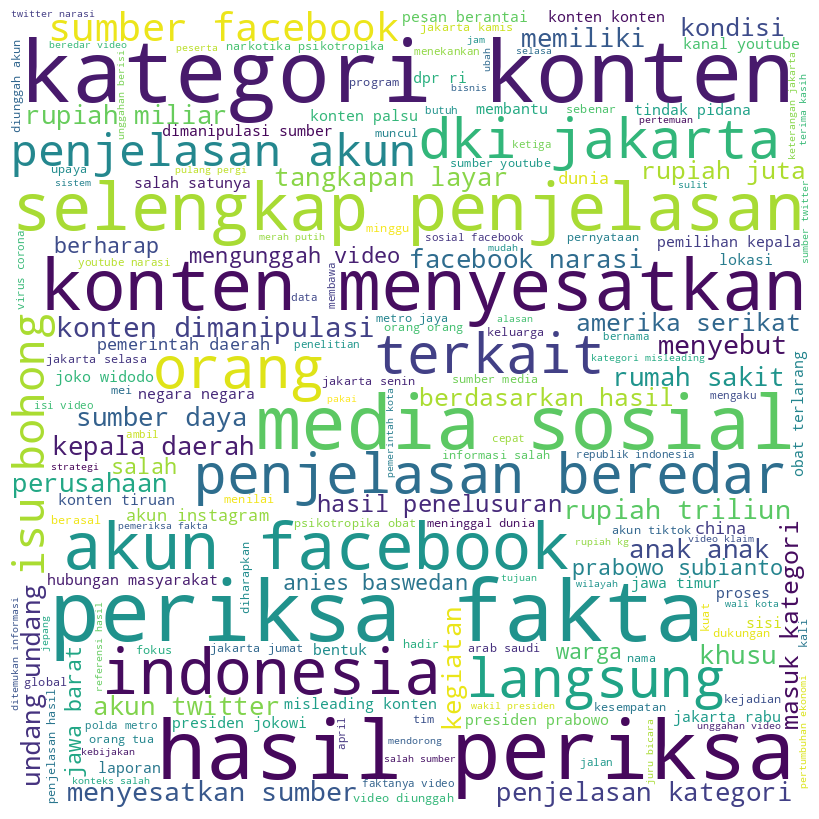

In [ ]:
from wordcloud import WordCloud

# Gabungkan semua teks di kolom 'text_final' menjadi satu string besar
all_text = ' '.join(data_combined['text_final'])

# Buat objek WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_text)

# Tampilkan wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Pelabelan

In [ ]:
print("Nilai unik di kolom 'Status':")
print(data_combined['status'].unique())

Nilai unik di kolom 'Status':
['FAKTA' 'HOAX' 'BELUM TERBUKTI' 'BENAR' 'BERITA' 'BERITA, EDUKASI'
 'Campuran; Disinformasi, Hasut, & Fakta' 'CEK FAKTA' 'DISINFORMASI'
 'DISINFORMASI & HASUT' 'DISINFORMASI + HASUT' 'DISINFORMASI, HASUT'
 'DISINFORMASI/MISINFORMASI' 'DISINFORMASI+FITNAH' 'DISINFORMASI+FRAMING'
 'DISINFORMASI+HASUT' 'EDUKASI' 'EDUKASI, BERITA' 'EDUKASI, HOAX'
 'EDUKASI,HOAX' 'FITNAH' 'FITNAH / HASUT' 'FITNAH+HASUT' 'FITNAH+HOAX'
 'FRAMING' 'HASUT' 'HASUT+FITNAH' 'Hoax' 'HOAX + HASUT'
 'HOAX + LOGICAL FALLACY' 'HOAX, HASUT' 'HOAX, HASUT, & PROVOKASI'
 'HOAX/FITNAH' 'HOAX/HASUT' 'HOAX+FITNAH' 'HOAX+HASUT' 'INFORMASI'
 'INFORMASI & EDUKASI' 'INFORMASI, EDUKASI' 'ISU' 'KLARIFIKASI'
 'Klarifikasi' 'KLARIFIKASI, EDUKASI' 'KOREKSI' 'MISINFORMASI'
 'Misinformasi' 'PARODI' 'PENIPUAN' 'SALAH' 'SALAH ' 'SATIRE' 'UPDATE']


In [ ]:
import pandas as pd

def normalisasi_label(status):
    status = str(status).strip().lower()

    # Kata kunci kategori HOAX
    hoax_keywords = [
        'penipuan', 'salah', 'hoax', 'hoaks', 'fitnah', 'hasut', 'framing',
        'disinformasi', 'misinformasi', 'scam', 'fitnah / hasut', 'hoax + logical fallacy', 'hasut+fitnah',
        'hoax+hasut', 'disinformasi+fitnah', 'disinformasi + hasut', 'disinformasi/misinformasi', 'fitnah+hasut',
        'disinformasi & hasut', 'disinformasi, hasut', 'disinformasi+framing', 'disinformasi+hasut', 'fitnah+hoax',
        'hoax + hasut', 'hoax kills', 'hoax, hasut', 'hoax, hasut, & provokasi', 'hoax/fitnah', 'hoax/hasut', 'hoax+fitnah'
    ]

    # Kata kunci kategori BELUM DIVERIFIKASI
    unverified_keywords = [
        'belum terbukti', 'isu', 'event', 'acara', 'satire', 'parodi', 'admin post', 'update', 'berita', 'berita, edukasi',
        'campuran; disinformasi, hasut, & fakta', 'edukasi, berita', 'edukasi, hoax', 'edukasi,hoax', 'informasi', 'info',
        'informasi, edukasi', 'informasi & edukasi'
    ]

    # Kata kunci kategori FAKTA
    fact_keywords = [
        'fakta', 'benar', 'edukasi', 'cek fakta', 'rilis pers', 'siaran pers', 'dokumentasi', 'klarifikasi', 'koreksi', 'cekfakta',
        'klarifikasi, edukasi'
    ]

    # Pemetaan berdasarkan keyword
    if any(keyword in status for keyword in hoax_keywords):
        return 'HOAX'
    elif any(keyword in status for keyword in unverified_keywords):
        return 'BELUM DIVERIFIKASI'
    elif any(keyword in status for keyword in fact_keywords):
        return 'FAKTA'
    else:
        return 'BELUM DIVERIFIKASI'  # fallback default

data_combined['Status_Normalized'] = data_combined['status'].apply(normalisasi_label)

<ipython-input-23-f574f4db3a4d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined['Status_Normalized'] = data_combined['status'].apply(normalisasi_label)



Distribusi Status_Normalized:
Status_Normalized
FAKTA                 16798
HOAX                  15267
BELUM DIVERIFIKASI      212
Name: count, dtype: int64


<ipython-input-24-ec0f2f9912f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_combined, x='Status_Normalized', order=data_combined['Status_Normalized'].value_counts().index, palette='viridis')


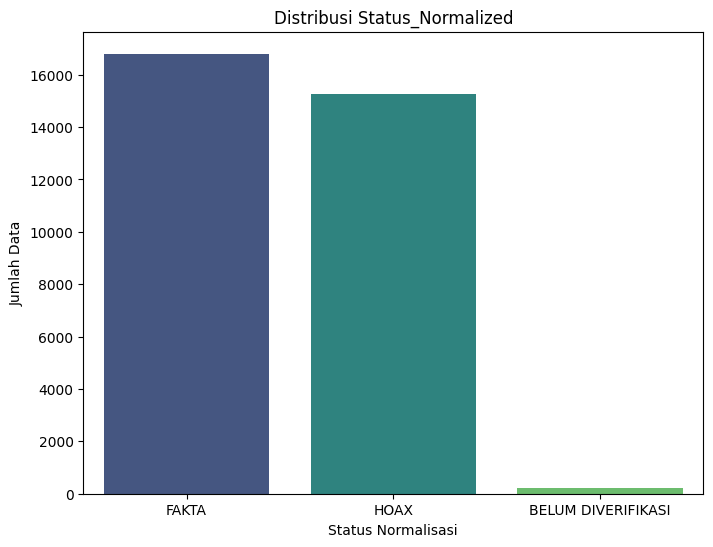

In [ ]:
# Melihat distribusi 'Status_Normalized'
print("\nDistribusi Status_Normalized:")
print(data_combined['Status_Normalized'].value_counts())

# Visualisasi distribusi 'Status_Normalized'
plt.figure(figsize=(8, 6))
sns.countplot(data=data_combined, x='Status_Normalized', order=data_combined['Status_Normalized'].value_counts().index, palette='viridis')
plt.title('Distribusi Status_Normalized')
plt.xlabel('Status Normalisasi')
plt.ylabel('Jumlah Data')
plt.show()


Distribusi Status_Normalized setelah menghapus 'BELUM DIVERIFIKASI':
Status_Normalized
FAKTA    16798
HOAX     15267
Name: count, dtype: int64


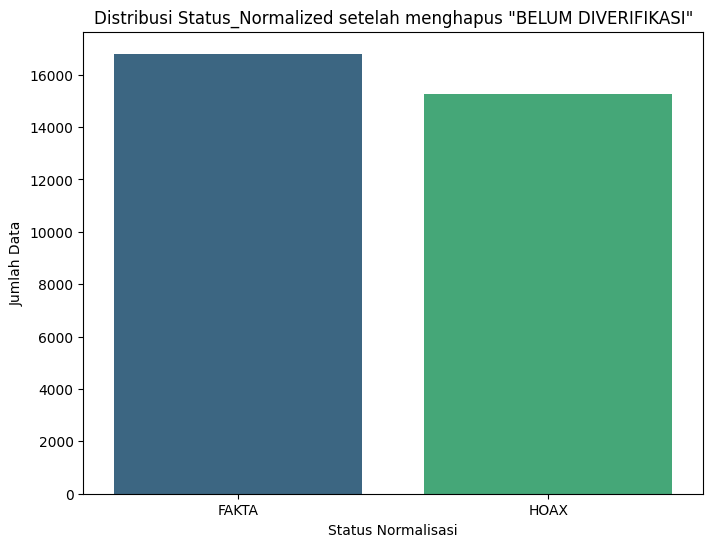

In [ ]:
# Menghapus baris di mana 'Status_Normalized' adalah 'BELUM DIVERIFIKASI'
data_combined = data_combined[data_combined['Status_Normalized'] != 'BELUM DIVERIFIKASI']

# Melihat distribusi 'Status_Normalized' setelah penghapusan
print("\nDistribusi Status_Normalized setelah menghapus 'BELUM DIVERIFIKASI':")
print(data_combined['Status_Normalized'].value_counts())

# Visualisasi distribusi 'Status_Normalized' setelah penghapusan
plt.figure(figsize=(8, 6))
sns.countplot(data=data_combined, x='Status_Normalized', order=data_combined['Status_Normalized'].value_counts().index, palette='viridis')
plt.title('Distribusi Status_Normalized setelah menghapus "BELUM DIVERIFIKASI"')
plt.xlabel('Status Normalisasi')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
print(data_combined.shape)
data_combined

(32065, 9)


,status,description,text_cleaned,text_casefolded,text_slangwords,text_tokenized,text_stopword,text_final,Status_Normalized
0,FAKTA,Jakarta (ANTARA) - Perusahaan manajer investas...,Jakarta ANTARA Perusahaan manajer investasi MI...,jakarta antara perusahaan manajer investasi mi...,jakarta antara perusahaan manajer investasi mi...,"[jakarta, antara, perusahaan, manajer, investa...","[jakarta, perusahaan, manajer, investasi, mi, ...",jakarta perusahaan manajer investasi mi pt hen...,FAKTA
1,FAKTA,Dallas--(ANTARA/Business Wire)-- Mary Kay Inc....,Dallas ANTARABusiness Wire Mary Kay Inc adalah...,dallas antarabusiness wire mary kay inc adalah...,dallas antarabusiness wire mary kay inc adalah...,"[dallas, antarabusiness, wire, mary, kay, inc,...","[dallas, antarabusiness, wire, mary, kay, inc,...",dallas antarabusiness wire mary kay inc penduk...,FAKTA
2,FAKTA,Jakarta (ANTARA) - Komisi Pemberantasan Korups...,Jakarta ANTARA Komisi Pemberantasan Korupsi KP...,jakarta antara komisi pemberantasan korupsi kp...,jakarta antara komisi pemberantasan korupsi kp...,"[jakarta, antara, komisi, pemberantasan, korup...","[jakarta, komisi, pemberantasan, korupsi, kpk,...",jakarta komisi pemberantasan korupsi kpk menda...,FAKTA
3,FAKTA,Jakarta (ANTARA) - Kementerian Komunikasi dan ...,Jakarta ANTARA Kementerian Komunikasi dan Digi...,jakarta antara kementerian komunikasi dan digi...,jakarta antara kementerian komunikasi dan digi...,"[jakarta, antara, kementerian, komunikasi, dan...","[jakarta, kementerian, komunikasi, digital, ke...",jakarta kementerian komunikasi digital kemkomd...,FAKTA
4,FAKTA,Pilihan baru untuk pemrosesan dan penyimpanan ...,Pilihan baru untuk pemrosesan dan penyimpanan ...,pilihan baru untuk pemrosesan dan penyimpanan ...,pilihan baru untuk pemrosesan dan penyimpanan ...,"[pilihan, baru, untuk, pemrosesan, dan, penyim...","[pilihan, pemrosesan, penyimpanan, data, indon...",pilihan pemrosesan penyimpanan data indonesia ...,FAKTA
...,...,...,...,...,...,...,...,...,...
32321,SALAH,Hasil periksa fakta Moch. Marcellodiansyah Fak...,Hasil periksa fakta Moch Marcellodiansyah Fakt...,hasil periksa fakta moch marcellodiansyah fakt...,hasil periksa fakta moch marcellodiansyah fakt...,"[hasil, periksa, fakta, moch, marcellodiansyah...","[hasil, periksa, fakta, moch, marcellodiansyah...",hasil periksa fakta moch marcellodiansyah fakt...,HOAX
32322,SALAH,Hasil Periksa Fakta Luthfiyah Postingan Facebo...,Hasil Periksa Fakta Luthfiyah Postingan Facebo...,hasil periksa fakta luthfiyah postingan facebo...,hasil periksa fakta luthfiyah postingan facebo...,"[hasil, periksa, fakta, luthfiyah, postingan, ...","[hasil, periksa, fakta, luthfiyah, postingan, ...",hasil periksa fakta luthfiyah postingan facebo...,HOAX
32323,SALAH,Hasil periksa fakta Raka. [FAKTANYA]: Klaim ba...,Hasil periksa fakta Raka FAKTANYA Klaim bahwa ...,hasil periksa fakta raka faktanya klaim bahwa ...,hasil periksa fakta raka faktanya klaim bahwa ...,"[hasil, periksa, fakta, raka, faktanya, klaim,...","[hasil, periksa, fakta, raka, faktanya, klaim,...",hasil periksa fakta raka faktanya klaim frekue...,HOAX
32324,SALAH,"Hasil periksa fakta Amanda Rahma Faktanya, vid...",Hasil periksa fakta Amanda Rahma Faktanya vide...,hasil periksa fakta amanda rahma faktanya vide...,hasil periksa fakta amanda rahma faktanya vide...,"[hasil, periksa, fakta, amanda, rahma, faktany...","[hasil, periksa, fakta, amanda, rahma, faktany...",hasil periksa fakta amanda rahma faktanya vide...,HOAX


In [ ]:
# Cek nilai unik di kolom Status_Normalized
print("Nilai unik di kolom 'Status_Normalized':")
print(data_combined['Status_Normalized'].unique())

Nilai unik di kolom 'Status_Normalized':
['FAKTA' 'HOAX']


In [ ]:
# Simpan DataFrame hanya dengan kolom 'text_final' dan 'Status_Normalized' ke file CSV
data_combined[['text_final', 'Status_Normalized']].to_csv('data_text_final_status_normalized.csv', index=False)

print("Data dengan kolom 'text_final' dan 'Status_Normalized' berhasil disimpan ke 'data_text_final_status_normalized.csv'")

Data dengan kolom 'text_final' dan 'Status_Normalized' berhasil disimpan ke 'data_text_final_status_normalized.csv'
